# Capstone Project

### Purpose

We will investigate what are the factors that drive the good or bad performance of high school students.

In [269]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import set_config
from sklearn.svm import SVC
from scipy.linalg import svd
from random import shuffle, seed
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from scipy.linalg import svd

set_config("figure")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [270]:
df_stu = pd.read_excel('exams.xlsx')

In [271]:
df_stu.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [333]:
df_stu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [334]:
df_stu.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

We observe that there is no null values nor nan values. We can then work with this data set.

As a first exploration of the data, we will plot some figures to know the different values taken by each feature.

### Proportion of male and female

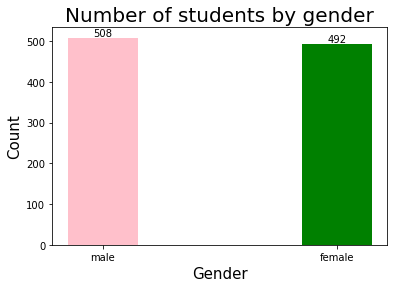

In [335]:
gen_count = df_stu['gender'].value_counts()
barplot = plt.bar(x=gen_count.index, 
                  height=gen_count.values, 
                  width=0.3, color=['pink','green'])
plt.bar_label(barplot,
              labels=[gen_count.values[0],
                      gen_count.values[1]
                      ],
              label_type='edge')
plt.title('Number of students by gender', fontdict={'fontsize':20})
plt.ylabel('Count', size=15)
plt.xlabel('Gender', size=15);

In [336]:
df_stu.groupby(['gender']).sum()

,math score,reading score,writing score
gender,,,
female,31869,36149,36132
male,35941,34233,33008


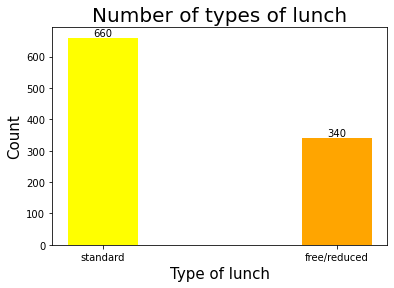

In [337]:
lunch_count = df_stu['lunch'].value_counts()
bar_lunch_plot = plt.bar(x=lunch_count.index,
                         height=lunch_count.values,
                         width=0.3, color=['yellow','orange'])
plt.bar_label(bar_lunch_plot,
              labels=[lunch_count.values[0],
                      lunch_count.values[1]
                      ],
              label_type='edge')
plt.title('Number of types of lunch', fontdict={'fontsize':20})
plt.ylabel('Count', size=15)
plt.xlabel('Type of lunch', size=15);

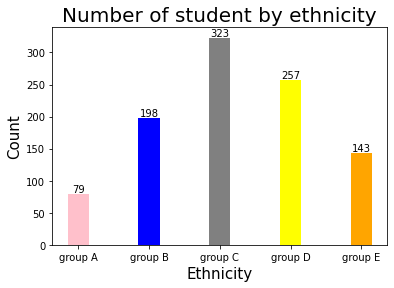

In [338]:
eth_count = df_stu['race/ethnicity'].value_counts().sort_index()
bar_eth_plot = plt.bar(x=eth_count.index,
                         height=eth_count.values,
                         width=0.3, color=['pink', 'blue', 'gray', 'yellow','orange'])
plt.bar_label(bar_eth_plot,
              labels=[eth_count.values[0],
                      eth_count.values[1],
                      eth_count.values[2],
                      eth_count.values[3],
                      eth_count.values[4]
                      ],
              label_type='edge')
plt.title('Number of student by ethnicity', fontdict={'fontsize':20})
plt.ylabel('Count', size=15)
plt.xlabel('Ethnicity', size=15);

#### Parental level of education

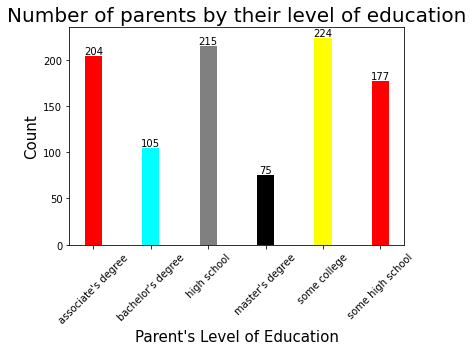

In [339]:
parlev_count = df_stu['parental level of education'].value_counts().sort_index()
bar_par_plot = plt.bar(x=parlev_count.index,
                         height=parlev_count.values,
                         width=0.3, color=['red', 'cyan', 'gray', 'black','yellow'])
plt.bar_label(bar_par_plot,
              labels=[parlev_count.values[0],
                      parlev_count.values[1],
                      parlev_count.values[2],
                      parlev_count.values[3],
                      parlev_count.values[4],
                      parlev_count.values[5]
                      ],
              label_type='edge')
plt.xticks(rotation=45);

plt.title('Number of parents by their level of education', fontdict={'fontsize':20})
plt.ylabel('Count', size=15)
plt.xlabel('Parent\'s Level of Education', size=15);

#### Test preparation course

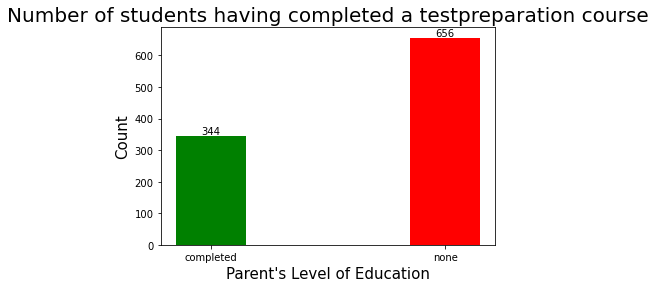

In [340]:
prep_count = df_stu['test preparation course'].value_counts().sort_index()
bar_par_plot = plt.bar(x=prep_count.index,
                         height=prep_count.values,
                         width=0.3, color=['green', 'red'])
plt.bar_label(bar_par_plot,
              labels=[prep_count.values[0],
                      prep_count.values[1]
                      ],
              label_type='edge')

plt.title('Number of students having completed a testpreparation course', fontdict={'fontsize':20})
plt.ylabel('Count', size=15)
plt.xlabel('Parent\'s Level of Education', size=15);

## Train set and test set

Our target feature will be the math score.

In [341]:
X = df_stu.drop(columns=['math score','reading score','writing score'], axis = 1)
y = df_stu['math score']

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Since our features are categorical, we will use a make_column_transformer 

In [343]:
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), 
                                       ['gender','lunch','race/ethnicity','parental level of education','test preparation course']
                                      ))

### Identification of Important Factors

In order to know which factors are determinant, we will make a Sequential Feature Selection combined with a Lasso Regression. 

In [344]:
selector = SequentialFeatureSelector(estimator=Lasso(),
                                     scoring = 'neg_mean_squared_error')

In [345]:
seq_pipe = Pipeline([('transformer',transformer),
                     ('column_selector', selector),
                     ('lasso', Lasso())
                    ])

Then we use a GridSearchCV to know which number of features is the best :

In [346]:
params_dict = {'column_selector__n_features_to_select': [1,2,3,4,5]}

In [347]:
seq_grid = GridSearchCV(seq_pipe, 
                        param_grid=params_dict)

In [348]:
seq_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['gender',
                                                                          'lunch',
                                                                          'race/ethnicity',
                                                                          'parental '
                                                                          'level '
                                                                          'of '
                                                                          'education',
                                                                          'test '
                                                                        

We will check now which columns have been selected by our model.

In [349]:
seq_grid.best_estimator_.named_steps['column_selector'].get_support()

array([ True,  True, False, False, False, False,  True, False, False,
       False, False, False, False,  True])

And we check the parameters of our best model.

In [350]:
seq_grid.best_estimator_.named_steps['column_selector'].get_params()

{'cv': 5,
 'direction': 'forward',
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 1000,
 'estimator__normalize': False,
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': Lasso(),
 'n_features_to_select': 4,
 'n_jobs': None,
 'scoring': 'neg_mean_squared_error'}

We also have a look in the importance of each factor.

In [351]:
seq_grid.best_estimator_.named_steps['lasso'].coef_

array([ 1.2039601 ,  7.88873017,  2.85575692, -0.41817617])

#### Performances

In [352]:
train_preds = seq_grid.predict(X_train)
test_preds = seq_grid.predict(X_test)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

In [353]:
print('train mse = ',train_mse)
print('test mse = ',test_mse)

train mse =  196.77712783865192
test mse =  182.46517590920982


#### Conclusions

The factors that, according to our model, can explain the good or bad performance in maths are, by deacreasing order of importance:

- lunch
- group E
- gender
- Parent's level of education

This can help to understand why it is important to have students with a good diet.